In [2]:
import requests
import json
import pandas as pd

api_key = '1ZxcVL8gBZIFARcf1f9lOR4SZsK1lTSF'

ticker = 'ASME.AS'
data_type = 'historical-price-full'

url = f"https://financialmodelingprep.com/api/v3/{data_type}/{ticker}?apikey={api_key}"

r = requests.get(url)
data = r.json()

In [13]:
list(data.keys()) != ['symbol','historical']
url

'https://financialmodelingprep.com/api/v3/historical-price-full/ASME.AS?apikey=1ZxcVL8gBZIFARcf1f9lOR4SZsK1lTSF'

In [8]:
data.keys()

dict_keys(['Error Message'])

In [9]:
def request_is_good(json_r):
    b_return = False
    req_keys = list(json_r.keys())
    if req_keys == ['symbol','historical']:
        b_return = True

    return b_return

In [10]:
request_is_good(data)

False

In [2]:
import os
pp='c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
os.listdir(pp)

['ADBE.csv',
 'ADSK.csv',
 'AMCR.csv',
 'AMD.csv',
 'AME.csv',
 'ASML.AS.csv',
 'BALL.csv',
 'DUOL.csv',
 'ENX.PA.csv',
 'INTC.csv',
 'IP.csv',
 'KO.csv',
 'LHA.DE.csv',
 'LOGI.csv',
 'MA.csv',
 'MDLZ.csv',
 'PFE.DE.csv',
 'PHIA.AS.csv',
 'PLTR.csv',
 'PYPL.csv',
 'RI.PA.csv',
 'SEE.csv',
 'TEAM.csv',
 'THULE.ST.csv',
 'UNA.AS.csv',
 'WDI.csv']

In [8]:
path = 'c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
ticker = "ADBE"
df_temp = pd.read_csv(path + ticker + '.csv')
df_temp = df_temp.set_index('date')
df_temp = df_temp[['adjClose']]
df_temp.rename(columns={'adjClose': ticker}, inplace=True)
market_data = df_temp

print(market_data)

              ADBE
date              
2024-05-17  483.43
2024-05-16  482.88
2024-05-15  485.35
2024-05-14  475.95
2024-05-13  483.11
2024-05-10  482.29
2024-05-09  482.65
2024-05-08  488.10
2024-05-07  492.27
2024-05-06  493.59
2024-05-03  486.18
2024-05-02  476.57
2024-05-01  469.39
2024-04-30  462.83
2024-04-29  473.07
2024-04-26  477.56
2024-04-25  473.44
2024-04-24  477.12
2024-04-23  472.90
2024-04-22  466.89
2024-04-19  465.02
2024-04-18  473.18
2024-04-17  474.45
2024-04-16  476.22
2024-04-15  470.10
2024-04-12  474.09
2024-04-11  484.28
2024-04-10  487.22
2024-04-09  492.55
2024-04-08  484.28
...            ...
2024-02-13  601.89
2024-02-12  611.84
2024-02-09  627.21
2024-02-08  615.86
2024-02-07  615.85
2024-02-06  607.14
2024-02-05  630.50
2024-02-02  634.76
2024-02-01  627.91
2024-01-31  617.78
2024-01-30  627.96
2024-01-29  630.23
2024-01-26  613.93
2024-01-25  622.58
2024-01-24  606.48
2024-01-23  597.18
2024-01-22  603.59
2024-01-19  611.55
2024-01-18  593.70
2024-01-17  

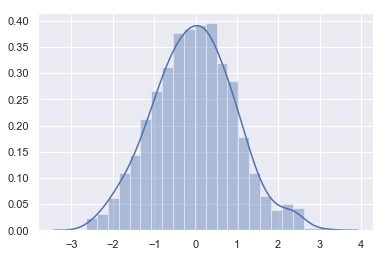

In [11]:
import scipy.stats as stats
import seaborn as sns
rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=1000)
sns.set()
sns.distplot(normal_sample)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

df_logreturns = market_data.apply(np.log)-market_data.shift(1).apply(np.log)
df_logreturns.dropna(inplace=True)
real_sample = df_logreturns.to_numpy()

stats.probplot(real_sample, dist="norm", plot=plt)

AttributeError: 'DataFrame' object has no attribute 'to_numpy'